In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv("calendar.csv")
selling_prices = pd.read_csv("sell_prices.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
sales = pd.read_csv("sales_train_validation.csv")

In [4]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


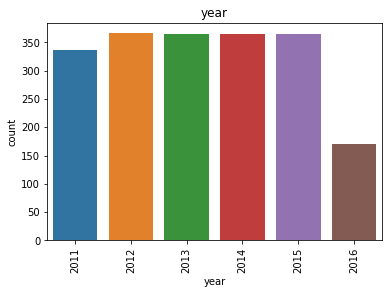

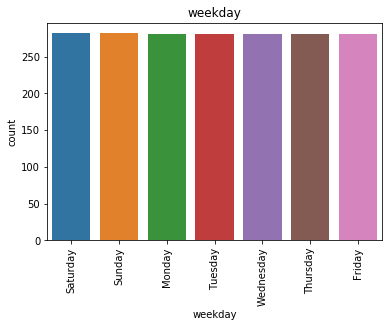

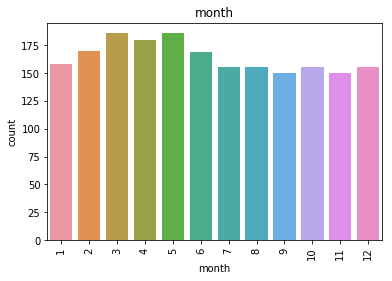

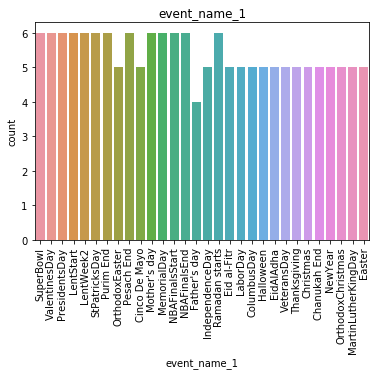

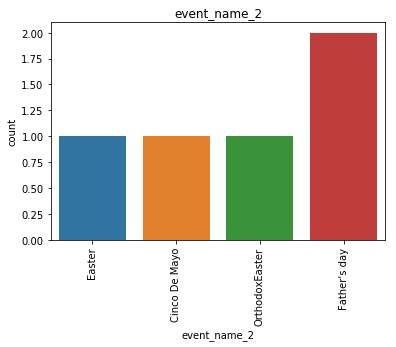

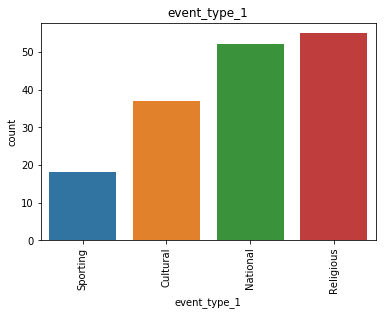

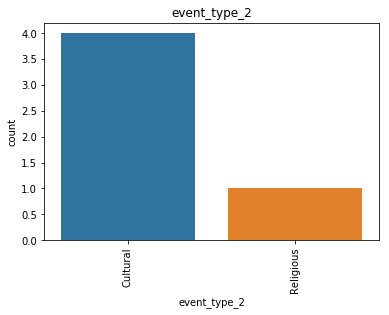

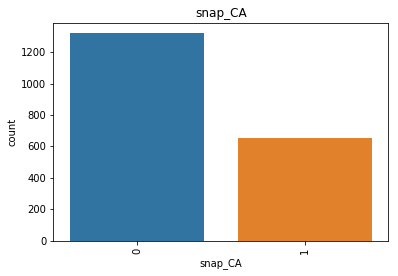

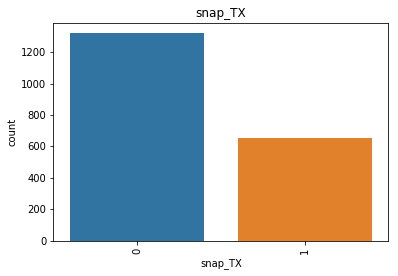

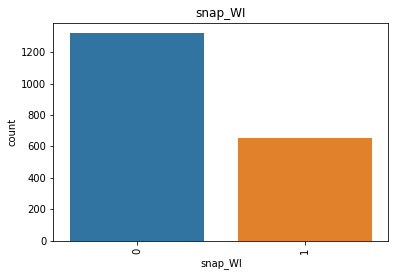

In [12]:
for i, var in enumerate(["year", "weekday", "month", "event_name_1", "event_name_2", 
                         "event_type_1", "event_type_2", "snap_CA", "snap_TX", "snap_WI"]):
    plt.figure()
    g = sns.countplot(calendar[var])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title(var)

In [6]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


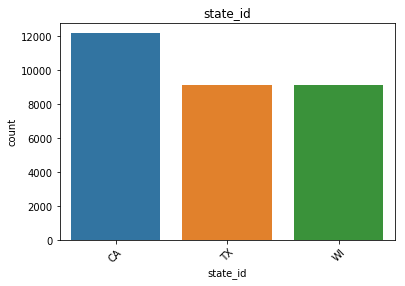

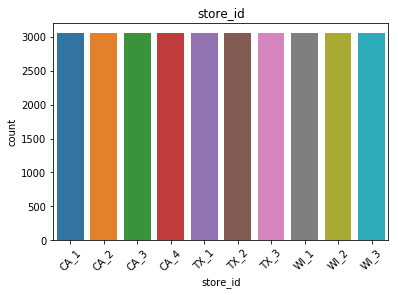

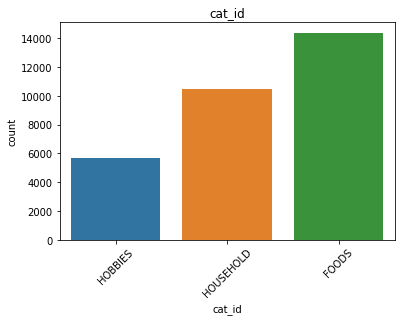

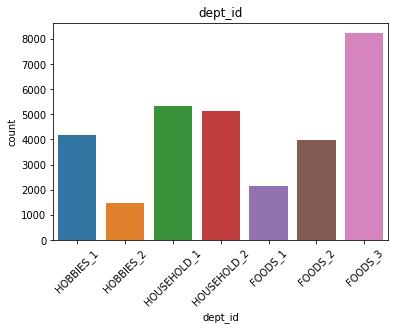

In [7]:
for i, var in enumerate(["state_id", "store_id", "cat_id", "dept_id"]):
    plt.figure()
    g = sns.countplot(sales[var])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    g.set_title(var)

In [8]:
sales.item_id.value_counts()

HOUSEHOLD_2_386    10
FOODS_3_709        10
FOODS_2_236        10
FOODS_3_463        10
HOUSEHOLD_2_294    10
FOODS_2_107        10
FOODS_3_478        10
HOUSEHOLD_2_457    10
HOBBIES_2_110      10
HOUSEHOLD_1_397    10
HOUSEHOLD_2_233    10
HOUSEHOLD_1_473    10
HOUSEHOLD_1_101    10
HOUSEHOLD_1_433    10
HOUSEHOLD_2_211    10
FOODS_2_151        10
FOODS_2_219        10
HOUSEHOLD_1_022    10
FOODS_3_629        10
FOODS_3_070        10
FOODS_2_266        10
FOODS_3_286        10
FOODS_3_011        10
FOODS_3_210        10
HOUSEHOLD_2_033    10
HOUSEHOLD_1_063    10
HOBBIES_1_146      10
HOUSEHOLD_1_382    10
HOUSEHOLD_2_004    10
FOODS_2_265        10
                   ..
FOODS_3_657        10
HOUSEHOLD_1_105    10
HOUSEHOLD_1_163    10
FOODS_3_156        10
HOBBIES_1_230      10
HOBBIES_1_142      10
HOBBIES_1_009      10
FOODS_3_631        10
HOBBIES_1_398      10
FOODS_3_726        10
FOODS_2_037        10
HOBBIES_1_352      10
FOODS_3_489        10
HOUSEHOLD_2_208    10
HOUSEHOLD_

In [9]:
def melt_sales(df):
    df = df.drop(["item_id", "dept_id", "cat_id", "store_id", "state_id"], axis=1).melt(
        id_vars=['id'], var_name='d', value_name='demand')
    return df

sales = melt_sales(sales)

In [10]:
sales.head()

,id,d,demand
0,HOBBIES_1_001_CA_1_validation,d_1,0
1,HOBBIES_1_002_CA_1_validation,d_1,0
2,HOBBIES_1_003_CA_1_validation,d_1,0
3,HOBBIES_1_004_CA_1_validation,d_1,0
4,HOBBIES_1_005_CA_1_validation,d_1,0


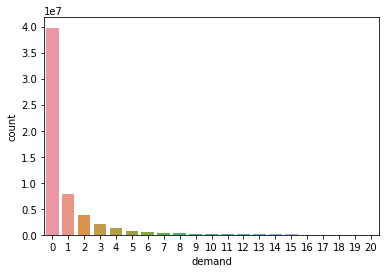

In [11]:
sns.countplot(sales["demand"][sales["demand"] <= 20], );